<a href="https://colab.research.google.com/github/jupsimar/Crypto-Automation-Website/blob/main/Automating_Crypto_Website_API_Pull_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'500',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3ec10db7-f404-49cb-87e8-a20e2604a56b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2022-12-29T14:23:14.512Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 3, 'notice': None, 'total_count': 8899}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9914, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [10]:
import pandas as pd


#To view all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
#This normalizes the data 
#Added a Timestamp Column

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

#Note: Column lst Updated is coming from the api and this will be simialr to the timestamp - For Testing

id                          name    symbol  \
0        1                       Bitcoin       BTC   
1     1027                      Ethereum       ETH   
2      825                        Tether      USDT   
3     3408                      USD Coin      USDC   
4     1839                           BNB       BNB   
5       52                           XRP       XRP   
6     4687                   Binance USD      BUSD   
7       74                      Dogecoin      DOGE   
8     2010                       Cardano       ADA   
9     3890                       Polygon     MATIC   
10    4943                           Dai       DAI   
11    1958                          TRON       TRX   
12    6636                      Polkadot       DOT   
13       2                      Litecoin       LTC   
14    5994                     Shiba Inu      SHIB   
15    7083                       Uniswap       UNI   
16    5805                     Avalanche      AVAX   
17    5426                        Solana       SOL   
18    3957                  UNUS SED LEO       LEO   
19    3717               Wrapped Bitcoin      WBTC   
20    1975                     Chainlink      LINK   
21     328                        Monero       XMR   
22    3794                        Cosmos      ATOM   
23   11419                       Toncoin       TON   
24    1321              Ethereum Classic       ETC   
25    1831                  Bitcoin Cash       BCH   
26     512                       Stellar       XLM   
27    3897                           OKB       OKB   
28    3635                        Cronos       CRO   
29    3155                         Quant       QNT   
30   18876                       ApeCoin       APE   
31    4030                      Algorand      ALGO   
32    3077                       VeChain       VET   
33    8916             Internet Computer       ICP   
34    6535                 NEAR Protocol      NEAR   
35    2280                      Filecoin       FIL   
36    4642                        Hedera      HBAR   
37    3330                    Pax Dollar      USDP   
38    1765                           EOS       EOS   
39    4172                 Terra Classic      LUNC   
40    3602                    Bitcoin SV       BSV   
41    2502                   Huobi Token        HT   
42    6892           MultiversX (Elrond)      EGLD   
43    7278                          Aave      AAVE   
44    2563                       TrueUSD      TUSD   
45    2416                 Theta Network     THETA   
46    4558                          Flow      FLOW   
47   19891                          USDD      USDD   
48   11221                        BitDAO       BIT   
49    2011                         Tezos       XTZ   
50    2087                  KuCoin Token       KCS   
51    4066                        Chiliz       CHZ   
52    6783                 Axie Infinity       AXS   
53    1437                         Zcash       ZEC   
54    6210                   The Sandbox      SAND   
55    3306                 Gemini Dollar      GUSD   
56   16086                BitTorrent-New       BTT   
57    5964            Trust Wallet Token       TWT   
58    1966                  Decentraland      MANA   
59    3513                        Fantom       FTM   
60    1518                         Maker       MKR   
61    7186                   PancakeSwap      CAKE   
62    4705                      PAX Gold      PAXG   
63    6719                     The Graph       GRT   
64     131                          Dash      DASH   
65    1720                          IOTA     MIOTA   
66    4256                        Klaytn      KLAY   
67    1376                           Neo       NEO   
68    4157                     THORChain      RUNE   
69    8642                       Fei USD       FEI   
70   10791                         eCash       XEC   
71   21794                         Aptos       APT   
72    2586                     Synthetix       SNX   
73   11857  

In [12]:
#Creating a function to call for data 

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3ec10db7-f404-49cb-87e8-a20e2604a56b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
          # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [13]:
#Simple way to run and display message till the data is loaded 
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: ignored

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#Use this if you want to create a csv and append data to it 
#Exported data to a Csv file on Drive 
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

if not os.path.isfile(r'/content/sample_data'):
  df.to_csv(r'/content/sample_data/API.csv', header='column_names')
else:
  df.to_csv(r'/content/sample_data/API.csv', mode='a', header=False)

In [16]:
df

id                          name    symbol  \
0        1                       Bitcoin       BTC   
1     1027                      Ethereum       ETH   
2      825                        Tether      USDT   
3     3408                      USD Coin      USDC   
4     1839                           BNB       BNB   
5       52                           XRP       XRP   
6     4687                   Binance USD      BUSD   
7       74                      Dogecoin      DOGE   
8     2010                       Cardano       ADA   
9     3890                       Polygon     MATIC   
10    4943                           Dai       DAI   
11    1958                          TRON       TRX   
12    6636                      Polkadot       DOT   
13       2                      Litecoin       LTC   
14    5994                     Shiba Inu      SHIB   
15    7083                       Uniswap       UNI   
16    5805                     Avalanche      AVAX   
17    5426                        Solana       SOL   
18    3957                  UNUS SED LEO       LEO   
19    3717               Wrapped Bitcoin      WBTC   
20    1975                     Chainlink      LINK   
21     328                        Monero       XMR   
22    3794                        Cosmos      ATOM   
23   11419                       Toncoin       TON   
24    1321              Ethereum Classic       ETC   
25    1831                  Bitcoin Cash       BCH   
26     512                       Stellar       XLM   
27    3897                           OKB       OKB   
28    3635                        Cronos       CRO   
29    3155                         Quant       QNT   
30   18876                       ApeCoin       APE   
31    4030                      Algorand      ALGO   
32    3077                       VeChain       VET   
33    8916             Internet Computer       ICP   
34    6535                 NEAR Protocol      NEAR   
35    2280                      Filecoin       FIL   
36    4642                        Hedera      HBAR   
37    3330                    Pax Dollar      USDP   
38    1765                           EOS       EOS   
39    4172                 Terra Classic      LUNC   
40    3602                    Bitcoin SV       BSV   
41    2502                   Huobi Token        HT   
42    6892           MultiversX (Elrond)      EGLD   
43    7278                          Aave      AAVE   
44    2563                       TrueUSD      TUSD   
45    2416                 Theta Network     THETA   
46    4558                          Flow      FLOW   
47   19891                          USDD      USDD   
48   11221                        BitDAO       BIT   
49    2011                         Tezos       XTZ   
50    2087                  KuCoin Token       KCS   
51    4066                        Chiliz       CHZ   
52    6783                 Axie Infinity       AXS   
53    1437                         Zcash       ZEC   
54    6210                   The Sandbox      SAND   
55    3306                 Gemini Dollar      GUSD   
56   16086                BitTorrent-New       BTT   
57    5964            Trust Wallet Token       TWT   
58    1966                  Decentraland      MANA   
59    3513                        Fantom       FTM   
60    1518                         Maker       MKR   
61    7186                   PancakeSwap      CAKE   
62    4705                      PAX Gold      PAXG   
63    6719                     The Graph       GRT   
64     131                          Dash      DASH   
65    1720                          IOTA     MIOTA   
66    4256                        Klaytn      KLAY   
67    1376                           Neo       NEO   
68    4157                     THORChain      RUNE   
69    8642                       Fei USD       FEI   
70   10791                         eCash       XEC   
71   21794                         Aptos       APT   
72    2586                     Synthetix       SNX   
73   11857  

In [17]:
# to view the number and deal with the scientific notation I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df

id                          name    symbol  \
0        1                       Bitcoin       BTC   
1     1027                      Ethereum       ETH   
2      825                        Tether      USDT   
3     3408                      USD Coin      USDC   
4     1839                           BNB       BNB   
5       52                           XRP       XRP   
6     4687                   Binance USD      BUSD   
7       74                      Dogecoin      DOGE   
8     2010                       Cardano       ADA   
9     3890                       Polygon     MATIC   
10    4943                           Dai       DAI   
11    1958                          TRON       TRX   
12    6636                      Polkadot       DOT   
13       2                      Litecoin       LTC   
14    5994                     Shiba Inu      SHIB   
15    7083                       Uniswap       UNI   
16    5805                     Avalanche      AVAX   
17    5426                        Solana       SOL   
18    3957                  UNUS SED LEO       LEO   
19    3717               Wrapped Bitcoin      WBTC   
20    1975                     Chainlink      LINK   
21     328                        Monero       XMR   
22    3794                        Cosmos      ATOM   
23   11419                       Toncoin       TON   
24    1321              Ethereum Classic       ETC   
25    1831                  Bitcoin Cash       BCH   
26     512                       Stellar       XLM   
27    3897                           OKB       OKB   
28    3635                        Cronos       CRO   
29    3155                         Quant       QNT   
30   18876                       ApeCoin       APE   
31    4030                      Algorand      ALGO   
32    3077                       VeChain       VET   
33    8916             Internet Computer       ICP   
34    6535                 NEAR Protocol      NEAR   
35    2280                      Filecoin       FIL   
36    4642                        Hedera      HBAR   
37    3330                    Pax Dollar      USDP   
38    1765                           EOS       EOS   
39    4172                 Terra Classic      LUNC   
40    3602                    Bitcoin SV       BSV   
41    2502                   Huobi Token        HT   
42    6892           MultiversX (Elrond)      EGLD   
43    7278                          Aave      AAVE   
44    2563                       TrueUSD      TUSD   
45    2416                 Theta Network     THETA   
46    4558                          Flow      FLOW   
47   19891                          USDD      USDD   
48   11221                        BitDAO       BIT   
49    2011                         Tezos       XTZ   
50    2087                  KuCoin Token       KCS   
51    4066                        Chiliz       CHZ   
52    6783                 Axie Infinity       AXS   
53    1437                         Zcash       ZEC   
54    6210                   The Sandbox      SAND   
55    3306                 Gemini Dollar      GUSD   
56   16086                BitTorrent-New       BTT   
57    5964            Trust Wallet Token       TWT   
58    1966                  Decentraland      MANA   
59    3513                        Fantom       FTM   
60    1518                         Maker       MKR   
61    7186                   PancakeSwap      CAKE   
62    4705                      PAX Gold      PAXG   
63    6719                     The Graph       GRT   
64     131                          Dash      DASH   
65    1720                          IOTA     MIOTA   
66    4256                        Klaytn      KLAY   
67    1376                           Neo       NEO   
68    4157                     THORChain      RUNE   
69    8642                       Fei USD       FEI   
70   10791                         eCash       XEC   
71   21794                         Aptos       APT   
72    2586                     Synthetix       SNX   
73   11857  

In [19]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  \
name                                                        
Bitcoin                                          -0.06188   
Ethereum                                          0.09120   
Tether                                            0.00237   
USD Coin                                          0.00146   
BNB                                              -0.02726   
XRP                                               0.15025   
Binance USD                                       0.01368   
Dogecoin                                         -0.10609   
Cardano                                           0.03862   
Polygon                                          -0.05263   
Dai                                               0.01087   
TRON                                              0.00235   
Polkadot                                         -0.11519   
Litecoin                                         -0.02312   
Shiba Inu                                         0.24924   
Uniswap                                          -0.15682   
Avalanche                                         0.07166   
Solana                                           -0.63595   
UNUS SED LEO                                     -0.80254   
Wrapped Bitcoin                                   0.03335   
Chainlink                                        -0.00646   
Monero                                            0.29784   
Cosmos                                           -0.57413   
Toncoin                                           2.48968   
Ethereum Classic                                  0.65225   
Bitcoin Cash                                     -0.14739   
Stellar                                          -0.02376   
OKB                                              -0.09146   
Cronos                                            0.04569   
Quant                                            -0.02239   
ApeCoin                                          -0.33942   
Algorand                                         -0.23723   
VeChain                                          -0.02988   
Internet Computer                                 0.16974   
NEAR Protocol                                    -0.00308   
Filecoin                                          0.18363   
Hedera                                           -0.17938   
Pax Dollar                                       -0.00158   
EOS                                               0.08346   
Terra Classic                                    -0.30214   
Bitcoin SV                                       -0.15465   
Huobi Token                                      -0.32465   
MultiversX (Elrond)                              -0.28789   
Aave                                              0.12539   
TrueUSD                                           0.01681   
Theta Network                                    -0.23631   
Flow                                              2.26959   
USDD                                             -0.04220   
BitDAO                                            0.08818   
Tezos                                            -0.13379   
KuCoin Token                                     -0.30661   
Chiliz                                           -0.75056   
Axie Infinity                                    -0.11897   
Zcash                                            -0.14305   
The Sandbox                                      -0.18123   
Gemini Dollar                                     0.11764   
BitTorrent-New                                    0.15455   
Trust Wallet Token                                0.24767   
Decentraland                                     -0.20326   
Fantom                                            0.10615   
Maker                                            -0.02509   
PancakeSwap                                      -0.23074   
PAX Gold                                          0.15230   
The Graph                                         0.06785   
Dash

In [20]:
df4 = df3.stack()
df4

name                                                      
Bitcoin                       quote.USD.percent_change_1h     -0.06188
                              quote.USD.percent_change_24h    -0.30483
                              quote.USD.percent_change_7d     -1.01791
                              quote.USD.percent_change_30d     1.17865
                              quote.USD.percent_change_60d   -19.64375
                              quote.USD.percent_change_90d   -14.90482
Ethereum                      quote.USD.percent_change_1h      0.09120
                              quote.USD.percent_change_24h     0.37595
                              quote.USD.percent_change_7d     -0.85374
                              quote.USD.percent_change_30d    -0.75379
                              quote.USD.percent_change_60d   -24.41273
                              quote.USD.percent_change_90d   -10.22851
Tether                        quote.USD.percent_change_1h      0.00237
                  

In [21]:
df5 = df4.to_frame(name='values')
df5

values
name                                                               
Bitcoin                      quote.USD.percent_change_1h   -0.06188
                             quote.USD.percent_change_24h  -0.30483
                             quote.USD.percent_change_7d   -1.01791
                             quote.USD.percent_change_30d   1.17865
                             quote.USD.percent_change_60d -19.64375
                             quote.USD.percent_change_90d -14.90482
Ethereum                     quote.USD.percent_change_1h    0.09120
                             quote.USD.percent_change_24h   0.37595
                             quote.USD.percent_change_7d   -0.85374
                             quote.USD.percent_change_30d  -0.75379
                             quote.USD.percent_change_60d -24.41273
                             quote.USD.percent_change_90d -10.22851
Tether                       quote.USD.percent_change_1h    0.00237
                             quote.USD.percent_change_24h  -0.00276
                             quote.USD.percent_change_7d   -0.02602
                             quote.USD.percent_change_30d   0.00451
                             quote.USD.percent_change_60d  -0.04166
                             quote.USD.percent_change_90d  -0.02628
USD Coin                     quote.USD.percent_change_1h    0.00146
                             quote.USD.percent_change_24h  -0.00092
                             quote.USD.percent_change_7d    0.01534
                             quote.USD.percent_change_30d  -0.01260
                             quote.USD.percent_change_60d   0.00503
                             quote.USD.percent_change_90d  -0.00721
BNB                          quote.USD.percent_change_1h   -0.02726
                             quote.USD.percent_change_24h   0.97318
                             quote.USD.percent_change_7d    1.32558
                             quote.USD.percent_change_30d -18.23439
                             quote.USD.percent_change_60d -20.51040
                             quote.USD.percent_change_90d -13.58108
XRP                          quote.USD.percent_change_1h    0.15025
                             quote.USD.percent_change_24h  -3.82221
                             quote.USD.percent_change_7d    0.11338
                             quote.USD.percent_change_30d -12.00878
                             quote.USD.percent_change_60d -24.96070
                             quote.USD.percent_change_90d -27.37320
Binance USD                  quote.USD.percent_change_1h    0.01368
                             quote.USD.percent_change_24h   0.00809
                             quote.USD.percent_change_7d    0.07051
                             quote.USD.percent_change_30d  -0.00408
                             quote.USD.percent_change_60d   0.04742
                             quote.USD.percent_change_90d   0.05787
Dogecoin                     quote.USD.percent_change_1h   -0.10609
                             quote.USD.percent_change_24h  -0.56540
                             quote.USD.percent_change_7d   -7.09272
                             quote.USD.percent_change_30d -30.51276
                             quote.USD.percent_change_60d -40.51549
                             quote.USD.percent_change_90d  17.05335
Cardano                      quote.USD.percent_change_1h    0.03862
                             quote.USD.percent_change_24h  -2.79424
                             quote.USD.percent_change_7d   -2.41983
                             quote.USD.percent_change_30d -20.70385
                             quote.USD.percent_change_60d -39.64797
                             quote.USD.percent_change_90d -43.35655
Polygon                      quote.USD.percent_change_1h   -0.05263
                             quote.USD.percent_change_24h  -0.22098
                             quote.USD.percent_change_7d   -0.67631
                             quote.USD.percent_ch

In [24]:
df5 = df4.to_frame(name='values')
df5


values
name                                                               
Bitcoin                      quote.USD.percent_change_1h   -0.06188
                             quote.USD.percent_change_24h  -0.30483
                             quote.USD.percent_change_7d   -1.01791
                             quote.USD.percent_change_30d   1.17865
                             quote.USD.percent_change_60d -19.64375
                             quote.USD.percent_change_90d -14.90482
Ethereum                     quote.USD.percent_change_1h    0.09120
                             quote.USD.percent_change_24h   0.37595
                             quote.USD.percent_change_7d   -0.85374
                             quote.USD.percent_change_30d  -0.75379
                             quote.USD.percent_change_60d -24.41273
                             quote.USD.percent_change_90d -10.22851
Tether                       quote.USD.percent_change_1h    0.00237
                             quote.USD.percent_change_24h  -0.00276
                             quote.USD.percent_change_7d   -0.02602
                             quote.USD.percent_change_30d   0.00451
                             quote.USD.percent_change_60d  -0.04166
                             quote.USD.percent_change_90d  -0.02628
USD Coin                     quote.USD.percent_change_1h    0.00146
                             quote.USD.percent_change_24h  -0.00092
                             quote.USD.percent_change_7d    0.01534
                             quote.USD.percent_change_30d  -0.01260
                             quote.USD.percent_change_60d   0.00503
                             quote.USD.percent_change_90d  -0.00721
BNB                          quote.USD.percent_change_1h   -0.02726
                             quote.USD.percent_change_24h   0.97318
                             quote.USD.percent_change_7d    1.32558
                             quote.USD.percent_change_30d -18.23439
                             quote.USD.percent_change_60d -20.51040
                             quote.USD.percent_change_90d -13.58108
XRP                          quote.USD.percent_change_1h    0.15025
                             quote.USD.percent_change_24h  -3.82221
                             quote.USD.percent_change_7d    0.11338
                             quote.USD.percent_change_30d -12.00878
                             quote.USD.percent_change_60d -24.96070
                             quote.USD.percent_change_90d -27.37320
Binance USD                  quote.USD.percent_change_1h    0.01368
                             quote.USD.percent_change_24h   0.00809
                             quote.USD.percent_change_7d    0.07051
                             quote.USD.percent_change_30d  -0.00408
                             quote.USD.percent_change_60d   0.04742
                             quote.USD.percent_change_90d   0.05787
Dogecoin                     quote.USD.percent_change_1h   -0.10609
                             quote.USD.percent_change_24h  -0.56540
                             quote.USD.percent_change_7d   -7.09272
                             quote.USD.percent_change_30d -30.51276
                             quote.USD.percent_change_60d -40.51549
                             quote.USD.percent_change_90d  17.05335
Cardano                      quote.USD.percent_change_1h    0.03862
                             quote.USD.percent_change_24h  -2.79424
                             quote.USD.percent_change_7d   -2.41983
                             quote.USD.percent_change_30d -20.70385
                             quote.USD.percent_change_60d -39.64797
                             quote.USD.percent_change_90d -43.35655
Polygon                      quote.USD.percent_change_1h   -0.05263
                             quote.USD.percent_change_24h  -0.22098
                             quote.USD.percent_change_7d   -0.67631
                             quote.USD.percent_ch

In [25]:
df5.count()

values    3000
dtype: int64

In [27]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(3000))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

values
0     -0.06188
1     -0.30483
2     -1.01791
3      1.17865
4    -19.64375
5    -14.90482
6      0.09120
7      0.37595
8     -0.85374
9     -0.75379
10   -24.41273
11   -10.22851
12     0.00237
13    -0.00276
14    -0.02602
15     0.00451
16    -0.04166
17    -0.02628
18     0.00146
19    -0.00092
20     0.01534
21    -0.01260
22     0.00503
23    -0.00721
24    -0.02726
25     0.97318
26     1.32558
27   -18.23439
28   -20.51040
29   -13.58108
30     0.15025
31    -3.82221
32     0.11338
33   -12.00878
34   -24.96070
35   -27.37320
36     0.01368
37     0.00809
38     0.07051
39    -0.00408
40     0.04742
41     0.05787
42    -0.10609
43    -0.56540
44    -7.09272
45   -30.51276
46   -40.51549
47    17.05335
48     0.03862
49    -2.79424
50    -2.41983
51   -20.70385
52   -39.64797
53   -43.35655
54    -0.05263
55    -0.22098
56    -0.67631
57    -6.31639
58   -14.24790
59     0.36428
60     0.01087
61     0.00962
62     0.05877
63     0.04403
64     0.03535
65     0.01228
66     0.00235
67     0.90053
68    -1.31741
69     1.42390
70   -14.55966
71   -11.82189
72    -0.11519
73    -0.36627
74    -2.66736
75   -17.89305
76   -34.14089
77   -32.42634
78    -0.02312
79    -0.98835
80     1.56853
81   -12.06873
82    20.44658
83    24.29390
84     0.24924
85    -0.20215
86    -4.17458
87   -12.23098
88   -34.66040
89   -28.69998
90    -0.15682
91     0.06823
92    -3.27251
93    -7.28851
94   -26.98759
95   -20.10535
96     0.07166
97    -1.78512
98    -4.21803
99   -10.99322
100  -38.82161
101  -35.58641
102   -0.63595
103   -6.27501
104  -22.29080
105  -31.25222
106  -71.03997
107  -72.60296
108   -0.80254
109   -0.49799
110   -5.82930
111   -7.59998
112  -21.60494
113  -24.51041
114    0.03335
115   -0.25631
116   -1.16317
117    1.05127
118  -19.91178
119  -15.13515
120   -0.00646
121   -0.85699
122   -4.07340
123  -22.53730
124  -24.56937
125  -26.31042
126    0.29784
127    1.13925
128   -0.35016
129    5.70550
130   -1.48957
131   -2.23613
132   -0.57413
133    1.89490
134    4.94643
135   -8.06057
136  -31.80345
137  -28.77164
138    2.48968
139    0.29719
140  -13.85932
141   19.57070
142   27.72565
143   51.35257
144    0.65225
145    1.82654
146   -4.15532
147  -20.15574
148  -37.27644
149  -43.86983
150   -0.14739
151   -0.24621
152   -0.85560
153  -10.08791
154  -14.65687
155  -14.62897
156   -0.02376
157   -0.36475
158   -3.61770
159  -18.50744
160  -35.67177
161  -36.50449
162   -0.09146
163    1.67859
164    9.31605
165   18.00145
166   49.06867
167   50.35940
168    0.04569
169   -2.13955
170    0.04348
171  -10.22146
172  -48.26022
173  -48.00067
174   -0.02239
175    0.24658
176    7.39878
177   -1.17190
178  -30.53032
179  -20.92734
180   -0.33942
181    0.05724
182    1.06273
183  -12.10953
184  -25.41328
185  -33.17598
186   -0.23723
187   -0.22490
188   -3.77189
189  -31.36839
190  -52.58703
191  -53.69942
192   -0.02988
193   -0.44149
194   -3.71237
195  -15.64144
196  -34.07129
197  -32.72730
198    0.16974
199    3.78547
200    9.94661
201    3.35815
202  -22.91145
203  -33.65918
204   -0.00308
205    0.13456
206    1.28798
207  -17.76433
208  -57.36629
209  -63.20671
210    0.18363
211    0.70780
212    2.05648
213  -30.89461
214  -45.27219
215  -47.39230
216   -0.17938
217   -2.63360
218   -6.36466
219  -17.64557
220  -33.74556
221  -29.60877
222   -0.00158
223    0.32947
224    0.12452
225   -0.06721
226    0.45911
227    0.06291
228    0.08346
229   -0.97724
230   -1.37987
231   -4.62706
232  -22.38231
233  -27.56192
234   -0.30214
235   -6.97028
236    8.52306
237   -8.92528
238  -40.35388
239  -51.38240
240   -0.15465
241    3.38544
242   -4.92804
243    1.06682
244  -11.73616
245  -13.70035
246   -0.32465
247    1.41573
248   -2.20742
249  -24.61848
250  -40.47054
251   19.61658
252   -0.28789
253   -1.35084
254   -4.36497
255  -21.63999
256  -42.54872
257  -31.59641
258    0.12539
259   -0.32266
260   -0.24253
261  -11.11715
262  -34.67532
263  -28.33357
264    0.01681
265    0.05126
266

In [38]:
# Change the column name

df7 = df6.rename(columns={'values': 'percent_change'})
df7


percent_change
0           -0.06188
1           -0.30483
2           -1.01791
3            1.17865
4          -19.64375
5          -14.90482
6            0.09120
7            0.37595
8           -0.85374
9           -0.75379
10         -24.41273
11         -10.22851
12           0.00237
13          -0.00276
14          -0.02602
15           0.00451
16          -0.04166
17          -0.02628
18           0.00146
19          -0.00092
20           0.01534
21          -0.01260
22           0.00503
23          -0.00721
24          -0.02726
25           0.97318
26           1.32558
27         -18.23439
28         -20.51040
29         -13.58108
30           0.15025
31          -3.82221
32           0.11338
33         -12.00878
34         -24.96070
35         -27.37320
36           0.01368
37           0.00809
38           0.07051
39          -0.00408
40           0.04742
41           0.05787
42          -0.10609
43          -0.56540
44          -7.09272
45         -30.51276
46         -40.51549
47          17.05335
48           0.03862
49          -2.79424
50          -2.41983
51         -20.70385
52         -39.64797
53         -43.35655
54          -0.05263
55          -0.22098
56          -0.67631
57          -6.31639
58         -14.24790
59           0.36428
60           0.01087
61           0.00962
62           0.05877
63           0.04403
64           0.03535
65           0.01228
66           0.00235
67           0.90053
68          -1.31741
69           1.42390
70         -14.55966
71         -11.82189
72          -0.11519
73          -0.36627
74          -2.66736
75         -17.89305
76         -34.14089
77         -32.42634
78          -0.02312
79          -0.98835
80           1.56853
81         -12.06873
82          20.44658
83          24.29390
84           0.24924
85          -0.20215
86          -4.17458
87         -12.23098
88         -34.66040
89         -28.69998
90          -0.15682
91           0.06823
92          -3.27251
93          -7.28851
94         -26.98759
95         -20.10535
96           0.07166
97          -1.78512
98          -4.21803
99         -10.99322
100        -38.82161
101        -35.58641
102         -0.63595
103         -6.27501
104        -22.29080
105        -31.25222
106        -71.03997
107        -72.60296
108         -0.80254
109         -0.49799
110         -5.82930
111         -7.59998
112        -21.60494
113        -24.51041
114          0.03335
115         -0.25631
116         -1.16317
117          1.05127
118        -19.91178
119        -15.13515
120         -0.00646
121         -0.85699
122         -4.07340
123        -22.53730
124        -24.56937
125        -26.31042
126          0.29784
127          1.13925
128         -0.35016
129          5.70550
130         -1.48957
131         -2.23613
132         -0.57413
133          1.89490
134          4.94643
135         -8.06057
136        -31.80345
137        -28.77164
138          2.48968
139          0.29719
140        -13.85932
141         19.57070
142         27.72565
143         51.35257
144          0.65225
145          1.82654
146         -4.15532
147        -20.15574
148        -37.27644
149        -43.86983
150         -0.14739
151         -0.24621
152         -0.85560
153        -10.08791
154        -14.65687
155        -14.62897
156         -0.02376
157         -0.36475
158         -3.61770
159        -18.50744
160        -35.67177
161        -36.50449
162         -0.09146
163          1.67859
164          9.31605
165         18.00145
166         49.06867
167         50.35940
168          0.04569
169         -2.13955
170          0.04348
171        -10.22146
172        -48.26022
173        -48.00067
174         -0.02239
175          0.24658
176          7.39878
177         -1.17190
178        -30.53032
179        -20.92734
180         -0.33942
181          0.05724
182          1.06273
183        -12.10953
184        -25.41328
185        -33.17598
186         -0.23723
187         -0.22490
188         -3.77189
189        -31.3

In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

percent_change
0           -0.06188
1           -0.30483
2           -1.01791
3            1.17865
4          -19.64375
5          -14.90482
6            0.09120
7            0.37595
8           -0.85374
9           -0.75379
10         -24.41273
11         -10.22851
12           0.00237
13          -0.00276
14          -0.02602
15           0.00451
16          -0.04166
17          -0.02628
18           0.00146
19          -0.00092
20           0.01534
21          -0.01260
22           0.00503
23          -0.00721
24          -0.02726
25           0.97318
26           1.32558
27         -18.23439
28         -20.51040
29         -13.58108
30           0.15025
31          -3.82221
32           0.11338
33         -12.00878
34         -24.96070
35         -27.37320
36           0.01368
37           0.00809
38           0.07051
39          -0.00408
40           0.04742
41           0.05787
42          -0.10609
43          -0.56540
44          -7.09272
45         -30.51276
46         -40.51549
47          17.05335
48           0.03862
49          -2.79424
50          -2.41983
51         -20.70385
52         -39.64797
53         -43.35655
54          -0.05263
55          -0.22098
56          -0.67631
57          -6.31639
58         -14.24790
59           0.36428
60           0.01087
61           0.00962
62           0.05877
63           0.04403
64           0.03535
65           0.01228
66           0.00235
67           0.90053
68          -1.31741
69           1.42390
70         -14.55966
71         -11.82189
72          -0.11519
73          -0.36627
74          -2.66736
75         -17.89305
76         -34.14089
77         -32.42634
78          -0.02312
79          -0.98835
80           1.56853
81         -12.06873
82          20.44658
83          24.29390
84           0.24924
85          -0.20215
86          -4.17458
87         -12.23098
88         -34.66040
89         -28.69998
90          -0.15682
91           0.06823
92          -3.27251
93          -7.28851
94         -26.98759
95         -20.10535
96           0.07166
97          -1.78512
98          -4.21803
99         -10.99322
100        -38.82161
101        -35.58641
102         -0.63595
103         -6.27501
104        -22.29080
105        -31.25222
106        -71.03997
107        -72.60296
108         -0.80254
109         -0.49799
110         -5.82930
111         -7.59998
112        -21.60494
113        -24.51041
114          0.03335
115         -0.25631
116         -1.16317
117          1.05127
118        -19.91178
119        -15.13515
120         -0.00646
121         -0.85699
122         -4.07340
123        -22.53730
124        -24.56937
125        -26.31042
126          0.29784
127          1.13925
128         -0.35016
129          5.70550
130         -1.48957
131         -2.23613
132         -0.57413
133          1.89490
134          4.94643
135         -8.06057
136        -31.80345
137        -28.77164
138          2.48968
139          0.29719
140        -13.85932
141         19.57070
142         27.72565
143         51.35257
144          0.65225
145          1.82654
146         -4.15532
147        -20.15574
148        -37.27644
149        -43.86983
150         -0.14739
151         -0.24621
152         -0.85560
153        -10.08791
154        -14.65687
155        -14.62897
156         -0.02376
157         -0.36475
158         -3.61770
159        -18.50744
160        -35.67177
161        -36.50449
162         -0.09146
163          1.67859
164          9.31605
165         18.00145
166         49.06867
167         50.35940
168          0.04569
169         -2.13955
170          0.04348
171        -10.22146
172        -48.26022
173        -48.00067
174         -0.02239
175          0.24658
176          7.39878
177         -1.17190
178        -30.53032
179        -20.92734
180         -0.33942
181          0.05724
182          1.06273
183        -12.10953
184        -25.41328
185        -33.17598
186         -0.23723
187         -0.22490
188         -3.77189
189        -31.3

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.catplot(x='percent_change', y=df7, data=df7, kind='point')

In [44]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                  timestamp
0  Bitcoin      16611.64246 2022-12-29 14:35:14.202846

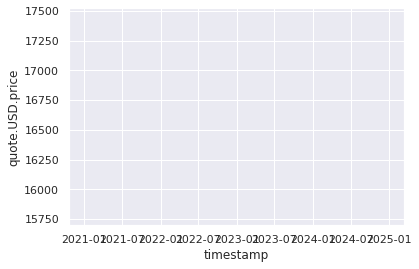

In [45]:

sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)